# Advanced Image Analysis
## Week 1

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from scipy import ndimage
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd

## Image convolution

In [13]:
def show_image(image):
    plt.figure(figsize=(7, 7))
    plt.imshow(image)

In [20]:
def create_1d_gaussian_kernel(t):
    return signal.gaussian(np.ceil(2 * 3 * t ** 0.5 + 1), std=t ** 0.5)

In [27]:
def convolve_with_1d_kernel(image, t, kernel=None):
    if not kernel:
        kernel = create_1d_gaussian_kernel(t)
    convolved_first = ndimage.convolve(image, [kernel], mode='nearest', cval=0.0)
    convolved_second = ndimage.convolve(convolved_first.T, [kernel], mode='nearest', cval=0.0).T
    return convolved_second

In [22]:
def convolve_with_2d_kernel(image, t):
    filtered = ndimage.gaussian_filter(image, sigma=t ** 0.5)
    return filtered

In [23]:
image = plt.imread('./week_1_data/fibres_xcth.png')

### Separability

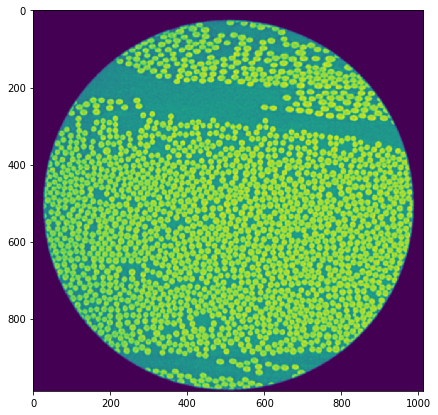

In [24]:
convolved_with_1d_kernel = convolve_with_1d_kernel(image, 3)
show_image(convolved_with_1d_kernel)

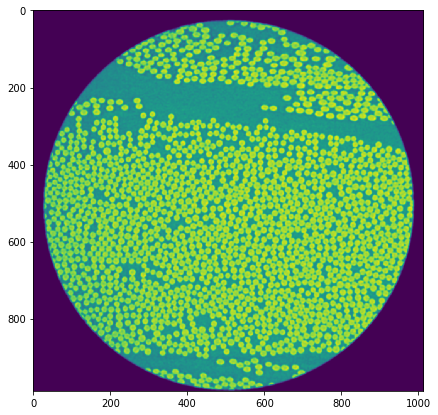

In [25]:
convolved_with_2d_kernel = convolve_with_2d_kernel(image, 3)
show_image(convolved_with_2d_kernel)

### Derivatives

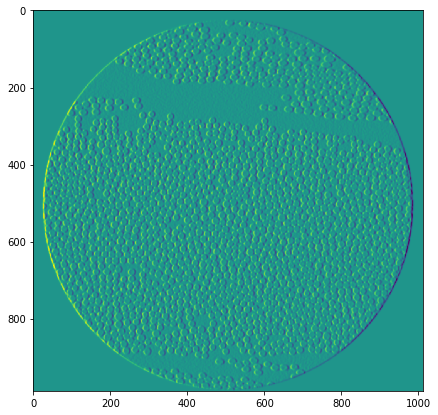

In [26]:
derivative = np.diff(convolved_with_1d_kernel)
show_image(derivative)

In [29]:
kernel = create_1d_gaussian_kernel(3)
convoluted = convolve_with_1d_kernel(image, 3, np.diff(kernel))
show_image(convoluted)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

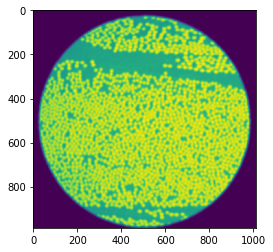

In [133]:
kernel = calculate_1d_gaussian(20)
convolved = image
convolved = convolve_1d_kernel(convolved, kernel)
    
plt.imshow(convolved)

In [134]:
convolved_tmp = convolved

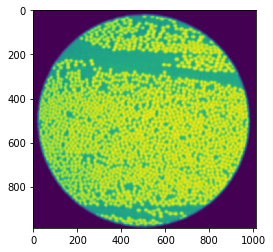

In [135]:
kernel = calculate_1d_gaussian(2)
convolved = image
for counter in range(10):
    convolved = convolve_1d_kernel(convolved, kernel)
    
plt.imshow(convolved)

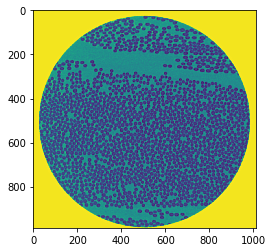

In [142]:
plt.imshow(convolved_tmp-convolved)

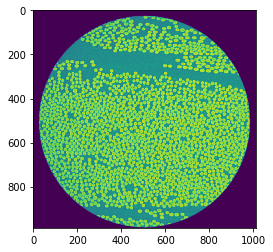

In [139]:
convolved = convolve_1d_kernel(image, kernel*10)
plt.imshow(convolved)

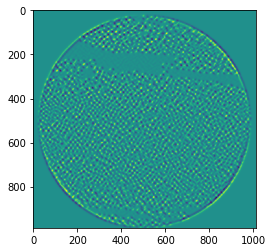

In [103]:
kernel = calculate_1d_gaussian(10)
convolved_1 = convolve_1d_kernel(image, kernel)
convolved_2 = convolve_1d_kernel(convolved_1, np.diff(kernel))
plt.imshow(convolved_2)

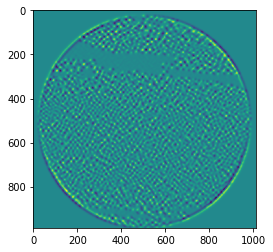

In [104]:
kernel = calculate_1d_gaussian(20)
convolved_2 = convolve_1d_kernel(convolved_1, np.diff(kernel))
plt.imshow(convolved_2)

In [176]:
image = Image.open('/Users/paweldarulewski/Documents/DTU/1_sem/02506 Advanced Image Analysis/1_week/week_1_data/fuel_cell_1.tif')
image = np.array(image)

In [177]:
a = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
a

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [178]:
np.pad(a, ((1, 0), (0, 0)), 'edge')

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [179]:
np.pad(a, ((0, 1), (0, 0)), 'edge')

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [7, 8, 9]])

In [180]:
pad_right = np.pad(image, ((0, 0), (0, 1)), 'edge')
pad_left = np.pad(image, ((0, 0), (1, 0)), 'edge')
pad_top = np.pad(image, ((1, 0), (0, 0)), 'edge')
pad_bottom = np.pad(image, ((0, 1), (0, 0)), 'edge')

In [181]:
vertical.shape

(989, 1013)

In [182]:
horizontal.shape

(988, 1014)

In [183]:
horizontal = (pad_right != pad_left)
vertical = (pad_top != pad_bottom)
vertical[:-1, :] + horizontal[:, :-1]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [184]:
sum(sum(vertical[:-1, :] + horizontal[:, :-1]))

13732

In [299]:
dino = pd.read_csv('/Users/paweldarulewski/Documents/DTU/1_sem/02506 Advanced Image Analysis/1_week/week_1_data/dino_noisy.txt', sep=' ', names=['x', 'y'])

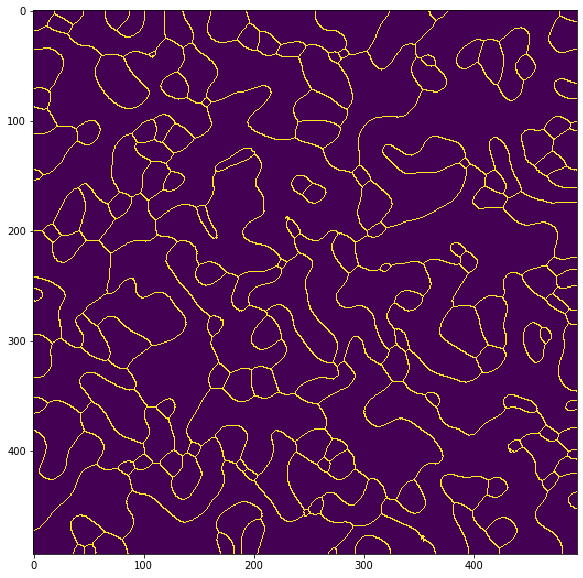

In [188]:
boundries = (vertical[:-1, :] + horizontal[:, :-1]) * 1
plt.figure(figsize=(10, 10))
plt.imshow(boundries)

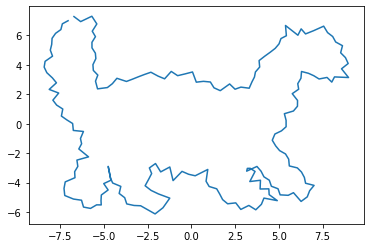

In [203]:
plt.plot(dino['x'], dino['y'])

In [230]:
# np.diagonal(,-2)/
m_0 = np.zeros((len(dino),len(dino)))
np.fill_diagonal(m_0,-2)
np.fill_diagonal(m_0[1:],1)
np.fill_diagonal(m_0[:,1:],1)
m_0[0,-1] = 1
m_0[-1,0] = 1
m_0 *= 0.5

In [231]:
m_0

array([[-1. ,  0.5,  0. , ...,  0. ,  0. ,  0.5],
       [ 0.5, -1. ,  0.5, ...,  0. ,  0. ,  0. ],
       [ 0. ,  0.5, -1. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ..., -1. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. , ...,  0.5, -1. ,  0.5],
       [ 0.5,  0. ,  0. , ...,  0. ,  0.5, -1. ]])

In [237]:
dino_new = (np.eye(len(dino))+m_0).dot(dino)

In [238]:
dino_new

array([[-6.683338 ,  6.960439 ],
       [-6.196156 ,  7.2828865],
       [-5.8626855,  6.8506695],
       [-5.6733355,  6.7864995],
       [-5.439594 ,  6.3396675],
       [-5.6703615,  5.901077 ],
       [-5.577616 ,  5.526854 ],
       [-5.5817505,  5.155246 ],
       [-5.5662855,  4.781796 ],
       [-5.553547 ,  4.3963505],
       [-5.5280535,  4.0170545],
       [-5.4833835,  3.6524435],
       [-5.538113 ,  3.2520515],
       [-5.3515715,  2.831874 ],
       [-5.1366445,  2.670225 ],
       [-4.935105 ,  2.5404805],
       [-4.5254045,  2.76668  ],
       [-4.109316 ,  2.792036 ],
       [-3.8105255,  3.050691 ],
       [-3.3656595,  3.02604  ],
       [-3.0192475,  3.18204  ],
       [-2.667688 ,  3.3386455],
       [-2.2864025,  3.2866155],
       [-1.9202485,  3.269051 ],
       [-1.525678 ,  3.388129 ],
       [-1.1557305,  3.1526615],
       [-0.7592765,  3.4615865],
       [-0.358646 ,  3.3851875],
       [-0.043527 ,  3.0973425],
       [ 0.3783065,  3.1925485],
       [ 0

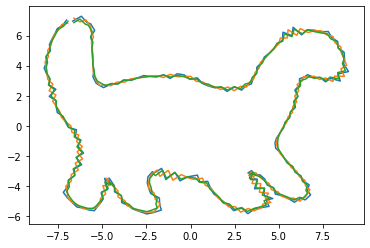

In [244]:
dino_new = dino
# plt.figure(figsize=(10, 10))
for iteration in range(3):
    dino_new = (np.eye(len(dino))+m_0).dot(dino_new)
    plt.plot(dino_new[:,0], dino_new[:,1])

In [249]:
dino_new = (1/(np.eye(len(dino)) - m_0)).dot(dino_new)

/Users/paweldarulewski/Documents/DTU/1_sem/02506 Advanced Image Analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


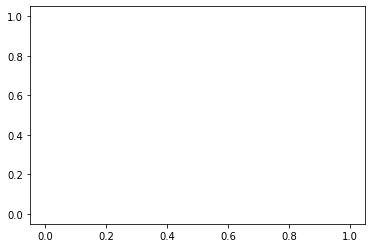

In [250]:
plt.plot(dino_new[:,0], dino_new[:,1])

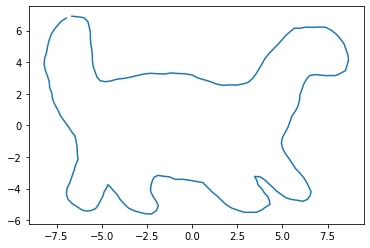

In [258]:
some_dino = np.linalg.inv(np.eye(len(dino)) - m_0 * 5).dot(dino)
plt.plot(some_dino[:,0], some_dino[:,1])

In [262]:
# np.diagonal(,-2)/
m_0 = np.zeros((len(dino),len(dino)))
np.fill_diagonal(m_0,2)
np.fill_diagonal(m_0[1:],-1)
np.fill_diagonal(m_0[:,1:],-1)
m_0[0,-1] = -1
m_0[-1,0] = -1
m_0 *= 0.5

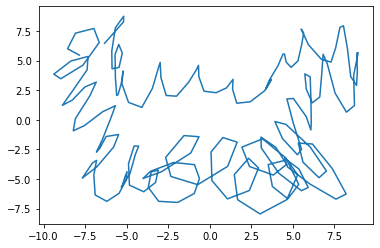

In [274]:
some_dino = np.linalg.inv(np.eye(len(dino)) - m_0 * 2).dot(dino)
plt.plot(some_dino[:,0], some_dino[:,1])

In [330]:
m_b = np.zeros((len(dino),len(dino)))
np.fill_diagonal(m_b,-6)
np.fill_diagonal(m_b[1:],4)
np.fill_diagonal(m_b[:,1:],4)
np.fill_diagonal(m_b[2:,:],-1)
np.fill_diagonal(m_b[:,2:],-1)
m_b[0,-1] = 4
m_b[-1,0] = 4
m_b[0,-2] = -1
m_b[-2,0] = -1
m_b[1,-1] = -1
m_b[-1,1] = -1
beta = 0.1
m_b *= beta

In [331]:
m_a = np.zeros((len(dino),len(dino)))
np.fill_diagonal(m_a,-2)
np.fill_diagonal(m_a[1:],1)
np.fill_diagonal(m_a[:,1:],1)
m_a[0,-1] = 1
m_a[-1,0] = 1
alpha = 0.5
m_a *= alpha

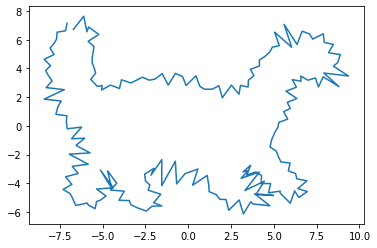

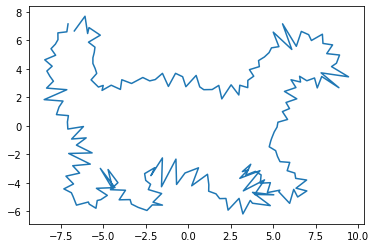

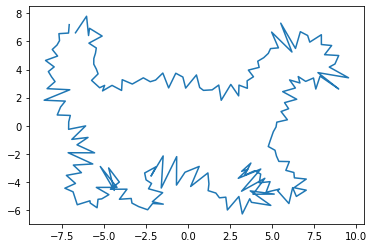

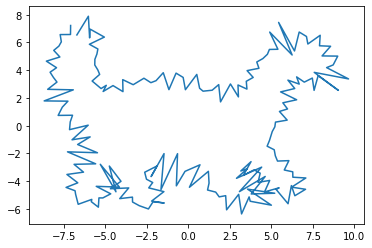

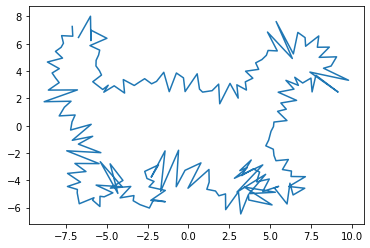

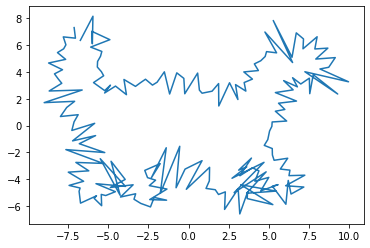

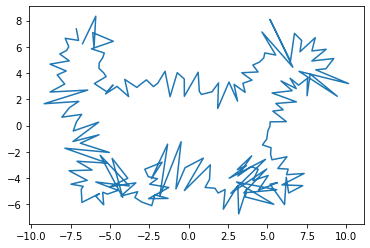

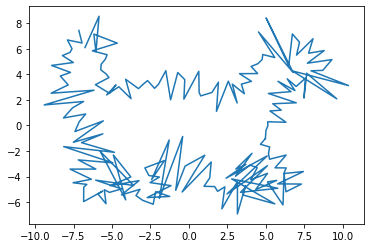

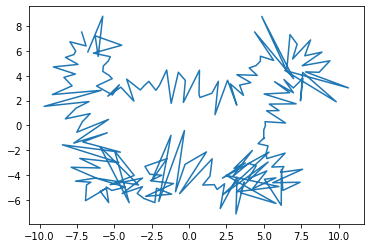

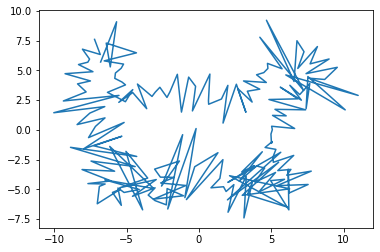

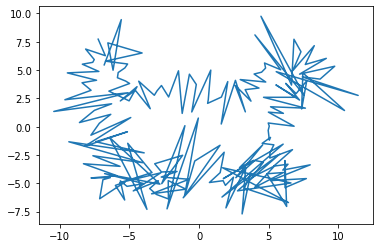

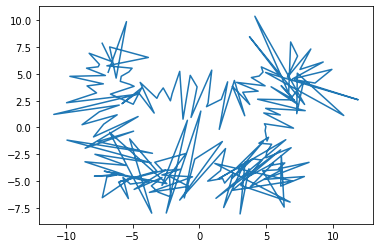

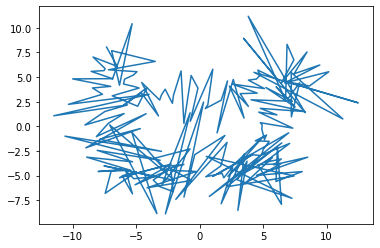

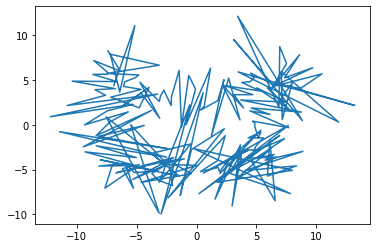

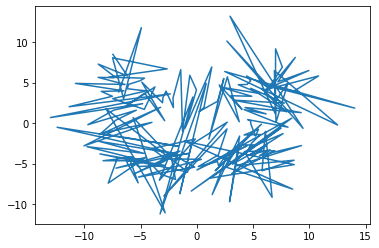

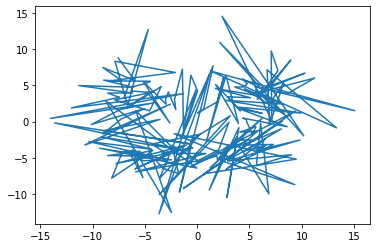

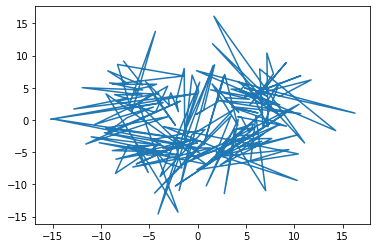

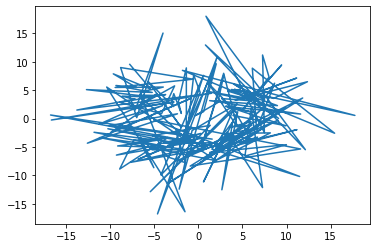

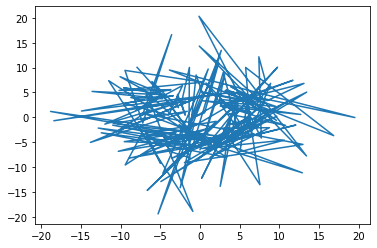

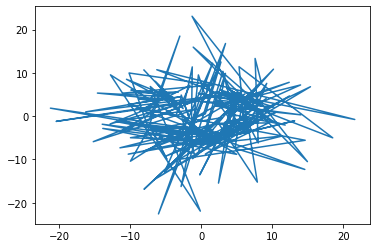

In [332]:
for i in range(0,20):
#     m_a *= 1.02
    m_b *= 1.2
    dino_new = (np.eye(len(dino))+m_a+m_b).dot(dino)
    plt.plot(dino_new[:,0], dino_new[:,1])
    plt.show()

In [335]:
import glob
files = sorted(glob.glob('/Users/paweldarulewski/Documents/DTU/1_sem/02506 Advanced Image Analysis/1_week/week_1_data/dental/*.png'))

In [336]:
files

['/Users/paweldarulewski/Documents/DTU/1_sem/02506 Advanced Image Analysis/1_week/week_1_data/dental/slice001.png',
 '/Users/paweldarulewski/Documents/DTU/1_sem/02506 Advanced Image Analysis/1_week/week_1_data/dental/slice002.png',
 '/Users/paweldarulewski/Documents/DTU/1_sem/02506 Advanced Image Analysis/1_week/week_1_data/dental/slice003.png',
 '/Users/paweldarulewski/Documents/DTU/1_sem/02506 Advanced Image Analysis/1_week/week_1_data/dental/slice004.png',
 '/Users/paweldarulewski/Documents/DTU/1_sem/02506 Advanced Image Analysis/1_week/week_1_data/dental/slice005.png',
 '/Users/paweldarulewski/Documents/DTU/1_sem/02506 Advanced Image Analysis/1_week/week_1_data/dental/slice006.png',
 '/Users/paweldarulewski/Documents/DTU/1_sem/02506 Advanced Image Analysis/1_week/week_1_data/dental/slice007.png',
 '/Users/paweldarulewski/Documents/DTU/1_sem/02506 Advanced Image Analysis/1_week/week_1_data/dental/slice008.png',
 '/Users/paweldarulewski/Documents/DTU/1_sem/02506 Advanced Image Analys

In [340]:
m = []
for file in files:
    image = plt.imread(file)
    m.append(image)
m = np.array(m)

(209, 256, 256)


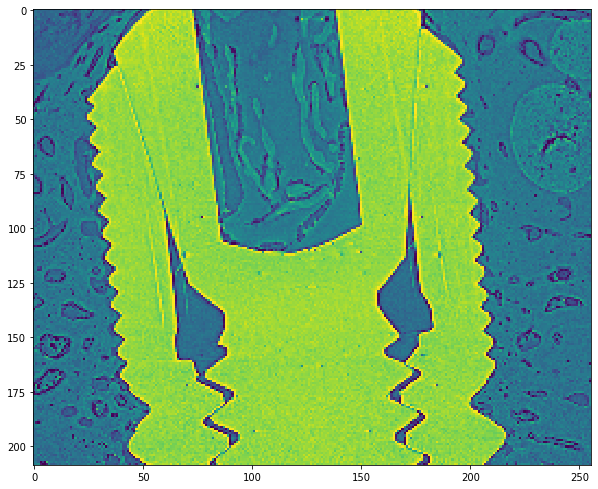

In [345]:
print(m.shape)
m_side = m[:,128,:]
plt.figure(figsize=(10, 10))
plt.imshow(m_side)

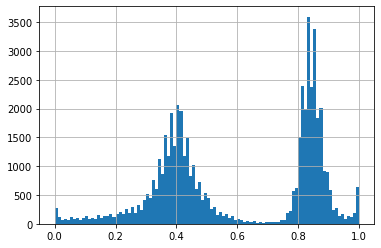

In [349]:
pd.Series(np.ravel(m_side)).hist(bins=100)

In [357]:
series = pd.Series(np.ravel(m_side))
series[series >= 0.7] = 1
series[series < 0.7] = 0
img_re = np.reshape(series.values,m_side.shape)

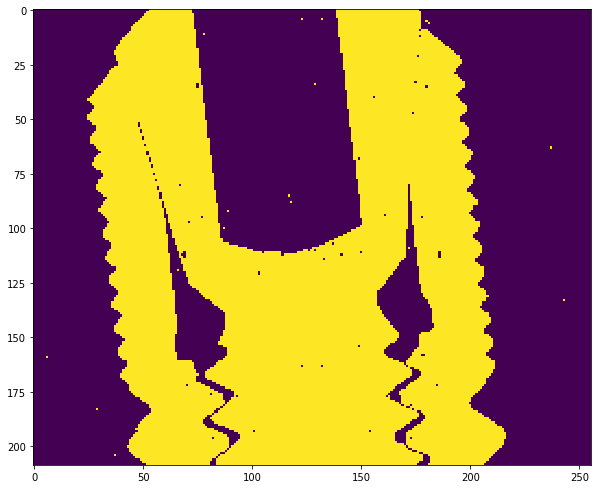

In [359]:
plt.figure(figsize=(10, 10))
plt.imshow(img_re)